# **Machine Learning**

**Linear Regression Lab**<br>
Dr. Jean-Marc Odobez<br>
Idiap Research Institute<br>
2019


# **Linear Regression**

This laboratory notebook is about polynomial linear regression using scikit-learn. It illustrates the concepts of over-fitting and under-fitting, by looking at the relations between the polynomial degree and the size of the training data (number of samples). Finally, regularized linear regression (ridge regression) is also presented to cope with noisy data. 




In [1]:
# Import libraries.
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

# Own libraries.
import utils
import test_exercises as tests

## **1. Create dataset**
The next cell allows to generate a dataset of (x, y) samples drawn from a step function.

In [2]:
# Create dataset.
def create_dataset(num_samples=100, test=False, noise=False):
    """This function creates the dataset samples (x, y),
    being x the data and y the target. The dataset is a 
    step function at 0.5.
    
    Parameters:
    + num_samples (int): Number of samples (x, y)
        (Default: 100 samples)
    + test (Boolean): Flag to create training or
        testing data (Default: False)
    + noise (Boolean): Flag to add random noise.
        
    Returns:
    + dataset (dict): Dictionary containing the samples
        data (x) and the corresponding targets (y)
    """
    
    # Select random seed.
    np.random.seed(0)
    if test: np.random.seed(2)
        
    # Generate samples (x, y) following
    # a step function.
    x = np.random.rand(num_samples)
    y = np.zeros_like(x)
    y[x>=0.5] = 1.0
    
    # Add random noise.
    if noise:
        x += 0.10*np.random.randn(num_samples)
        y += 0.20*np.random.randn(num_samples)
        
    # Dataset.
    dataset = {'x':x, 'y':y}
    
    return dataset 

Run the code below to create the training and test datasets.

In [3]:
# Parameters.
num_train_samples = 100
num_test_samples = 1000

# Create train and test data.
train_set = create_dataset(num_train_samples, test=False)
test_set = create_dataset(num_test_samples, test=True)

# Message.
print('Dataset format:')
print('+ Train data:', train_set['x'].shape)
print('+ Test data:', test_set['x'].shape)

Dataset format:
+ Train data: (100,)
+ Test data: (1000,)


The dataset samples (train and test sets) are shown in the next cell.

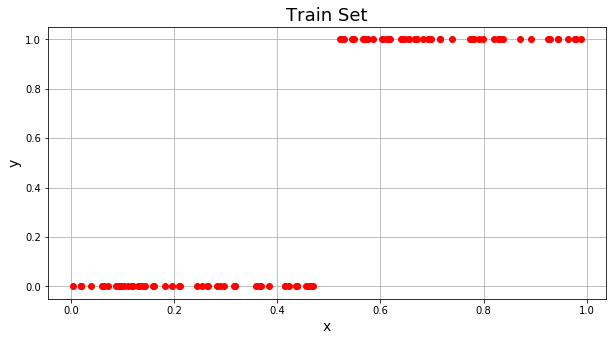

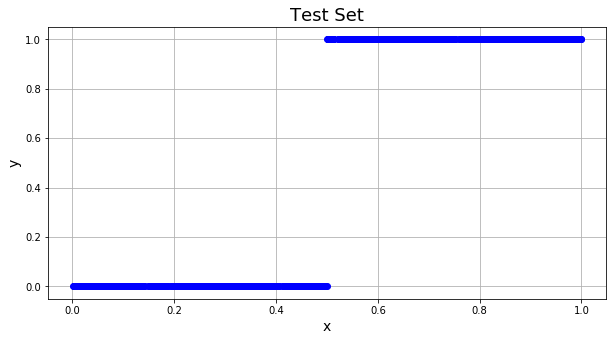

In [4]:
# Show train and test samples.
utils.show_dataset(train_set, 'Train Set', color='r')
utils.show_dataset(test_set, 'Test Set', color='b')

## **2. Polynomial linear regression**
In the next cell we define the function which performs polynomial linear regression.

<font color="blue" size="+1">**Exercise 1: Linear regression**</font>

Complete the following function to perform polynomial linear regression. You can either implement the function by yourself (building the feature matrices by yourself and preparing the linear system to be solved), or using scikit-learn. In the second case, you can use the hints below. 

***Hint***: Use [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) to implement the function.


In [44]:
# Polynomial linear regression.
def poly_linear_regression(train_set, test_set, degree=0):
    """This function peforms polynomial linear regression using 
    the train data set. The obtained model is then used to 
    predict the targets for the train and test sets.
    
    Parameters:
    + train_set (dict): Dictionary with the train samples (x, y).
    + test_set (dict): Dictionary with the test samples (x, y).
    + degree (int): Polynomial degree (Default: 0).
  
    Returns:
    + model (class): Trained linear model.
    + pred (dict): Dictionary containing the predictions for
        train and test samples.
    """
    
    # Create linear regression model.
    model = LinearRegression()

    # Transforming the train and test data to 
    # include another axis.
    x_train = train_set['x'][:, np.newaxis]
    y_train = train_set['y'][:, np.newaxis]
    x_test = test_set['x'][:, np.newaxis]
    y_test = test_set['y'][:, np.newaxis]
  
    #==================================================
    # TODO: Complete the next lines to get the 
    # polynomial features for train and test data sets.
    poly_feats = PolynomialFeatures(degree=degree)
    x_poly_train = poly_feats.fit_transform(x_train)
    x_poly_test = poly_feats.fit_transform(x_test)
    x_poly_train.shape
    #==================================================
    
    #==================================================
    # TODO: Complete the next line to fit/train the
    # linear model.
    model.fit(x_poly_train,y_train)
    #==================================================
    
    #==================================================
    # TODO: Complete the next lines to compute the
    # predictions for the train and test samples.
    y_pred_train = model.predict(x_poly_train)
    y_pred_test = model.predict(x_poly_test)
    pred = {'train':y_pred_train, 'test':y_pred_test}
    #==================================================
       
    return model, pred

#### **Test your exercise**
Run the next cell to test your exercise

In [45]:
# Check implementation.
tests.test_linear_regression(poly_linear_regression)  

Checking exercise
>> Run test 1 ...  ok
>> Run test 2 ...  ok
The exercise is correct. Well done !!!


## **3. Exp: Polynomial degree**
The code below applies polynomial linear regression using the training and test datasets for varying polynomial degrees.

<font color="blue" size="+1">**Exercise 2: Polynomial degree**</font>

Complete the code to perform polynomial linear regression and answer the next questions:

<font color="red">**Q1**</font>: What is the impact of the polynomial degree on the (train/test) data fitting? How can you explain it?<br> The higher it is the more it overfits
<font color="red">**Q2**</font>: What does the returned value for degree 0 correspond to? <br> Corresponds to the mean



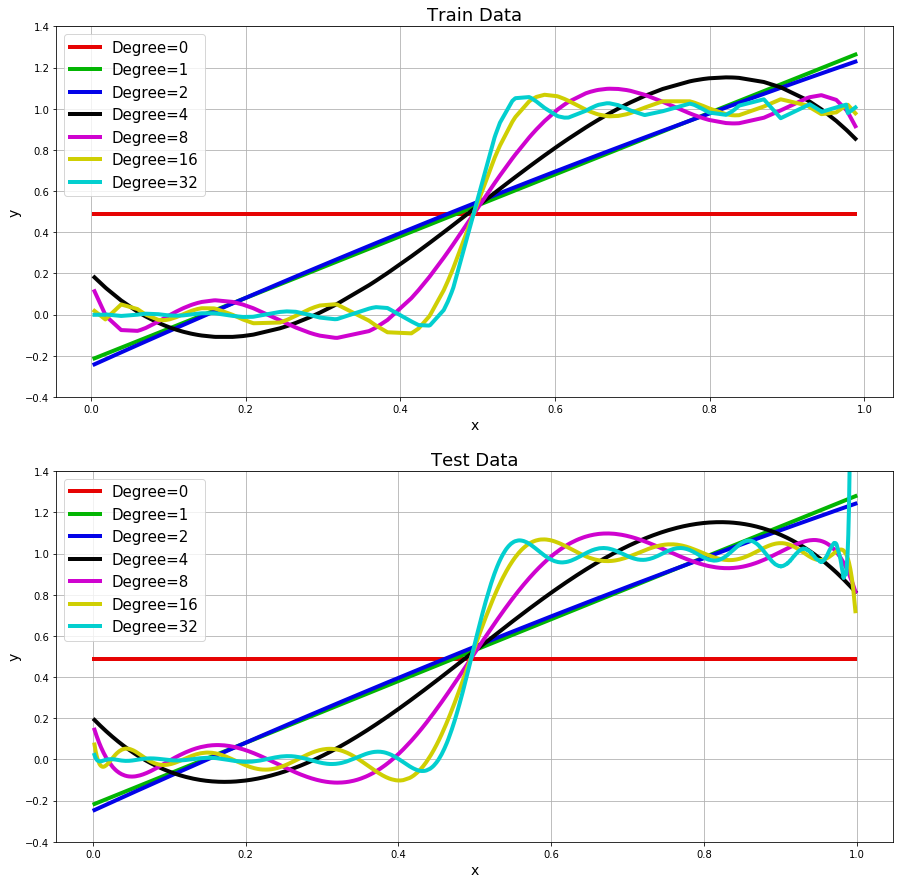

In [46]:
# Parameters.
degree = [0,1,2,4,8,16,32]

# Polynomial degree.
preds = {} # All predictions.
for d in degree:
   
    #============================================================
    # TODO: Complete the next line to run polynomial linear 
    # regression.
    model, pred = poly_linear_regression(train_set, test_set, d)
    #============================================================
    
    # Save predictions.
    preds[d] = {'train':{'x':train_set['x'], 'y':pred['train']}, \
                'test':{'x':test_set['x'], 'y':pred['test']}}
        
# Show prediction plots.   
utils.show_predictions(preds)

In the next cell the Root Mean Squared Error (RMSE) is calculated by comparing the dataset target values (ground truth) and their corresponding predictions.

<font color="blue" size="+1">**Exercise 3: RMSE**</font>

Complete the next function to compute RMSE. 

***Hint***: Use [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) to implement the function.


In [56]:
# Root mean squared error.
def compute_rmse(y_gt, y_pred):
    """This function computes RMSE.
    
    Parameters:
    + y_gt (Numpy ndarray): Nd vector containing the targets 
        -ground truth-, being N the number of samples.
    + y_pred (Numpy ndarray): Nd vector containing the target 
        predictions, being N the number of samples.
    
    Returns:
    + rmse (float): Root mean squared error.
    """
    
    #================================================
    # TODO: Complete the next line to compute RMSE.
    rmse = np.sqrt(mean_squared_error(y_gt, y_pred))
    #================================================
    
    return rmse

#### **Test your exercise**
Run the next cell to test your exercise

In [57]:
# Check implementation.
tests.test_compute_rmse(compute_rmse)

Checking exercise
>> Check float ...  ok
>> Run test  ...  ok
The exercise is correct. Well done !!!


## **4. Exp: Train data size**
The code below applies polynomial linear regression for different polynomial degrees and different numbers of training samples.

<font color="blue" size="+1">**Exercise 4: impact of training data size**</font>

Complete the next code to perform polynomial linear regression with different training sets.

<font color="red">**Q1**</font>: What is the effect of the training data size on data fitting?<br>
<font color="red">**Q2**</font>: Does it have more effect on polynomial with lower or higher degree?
<br> The more the data the better the result


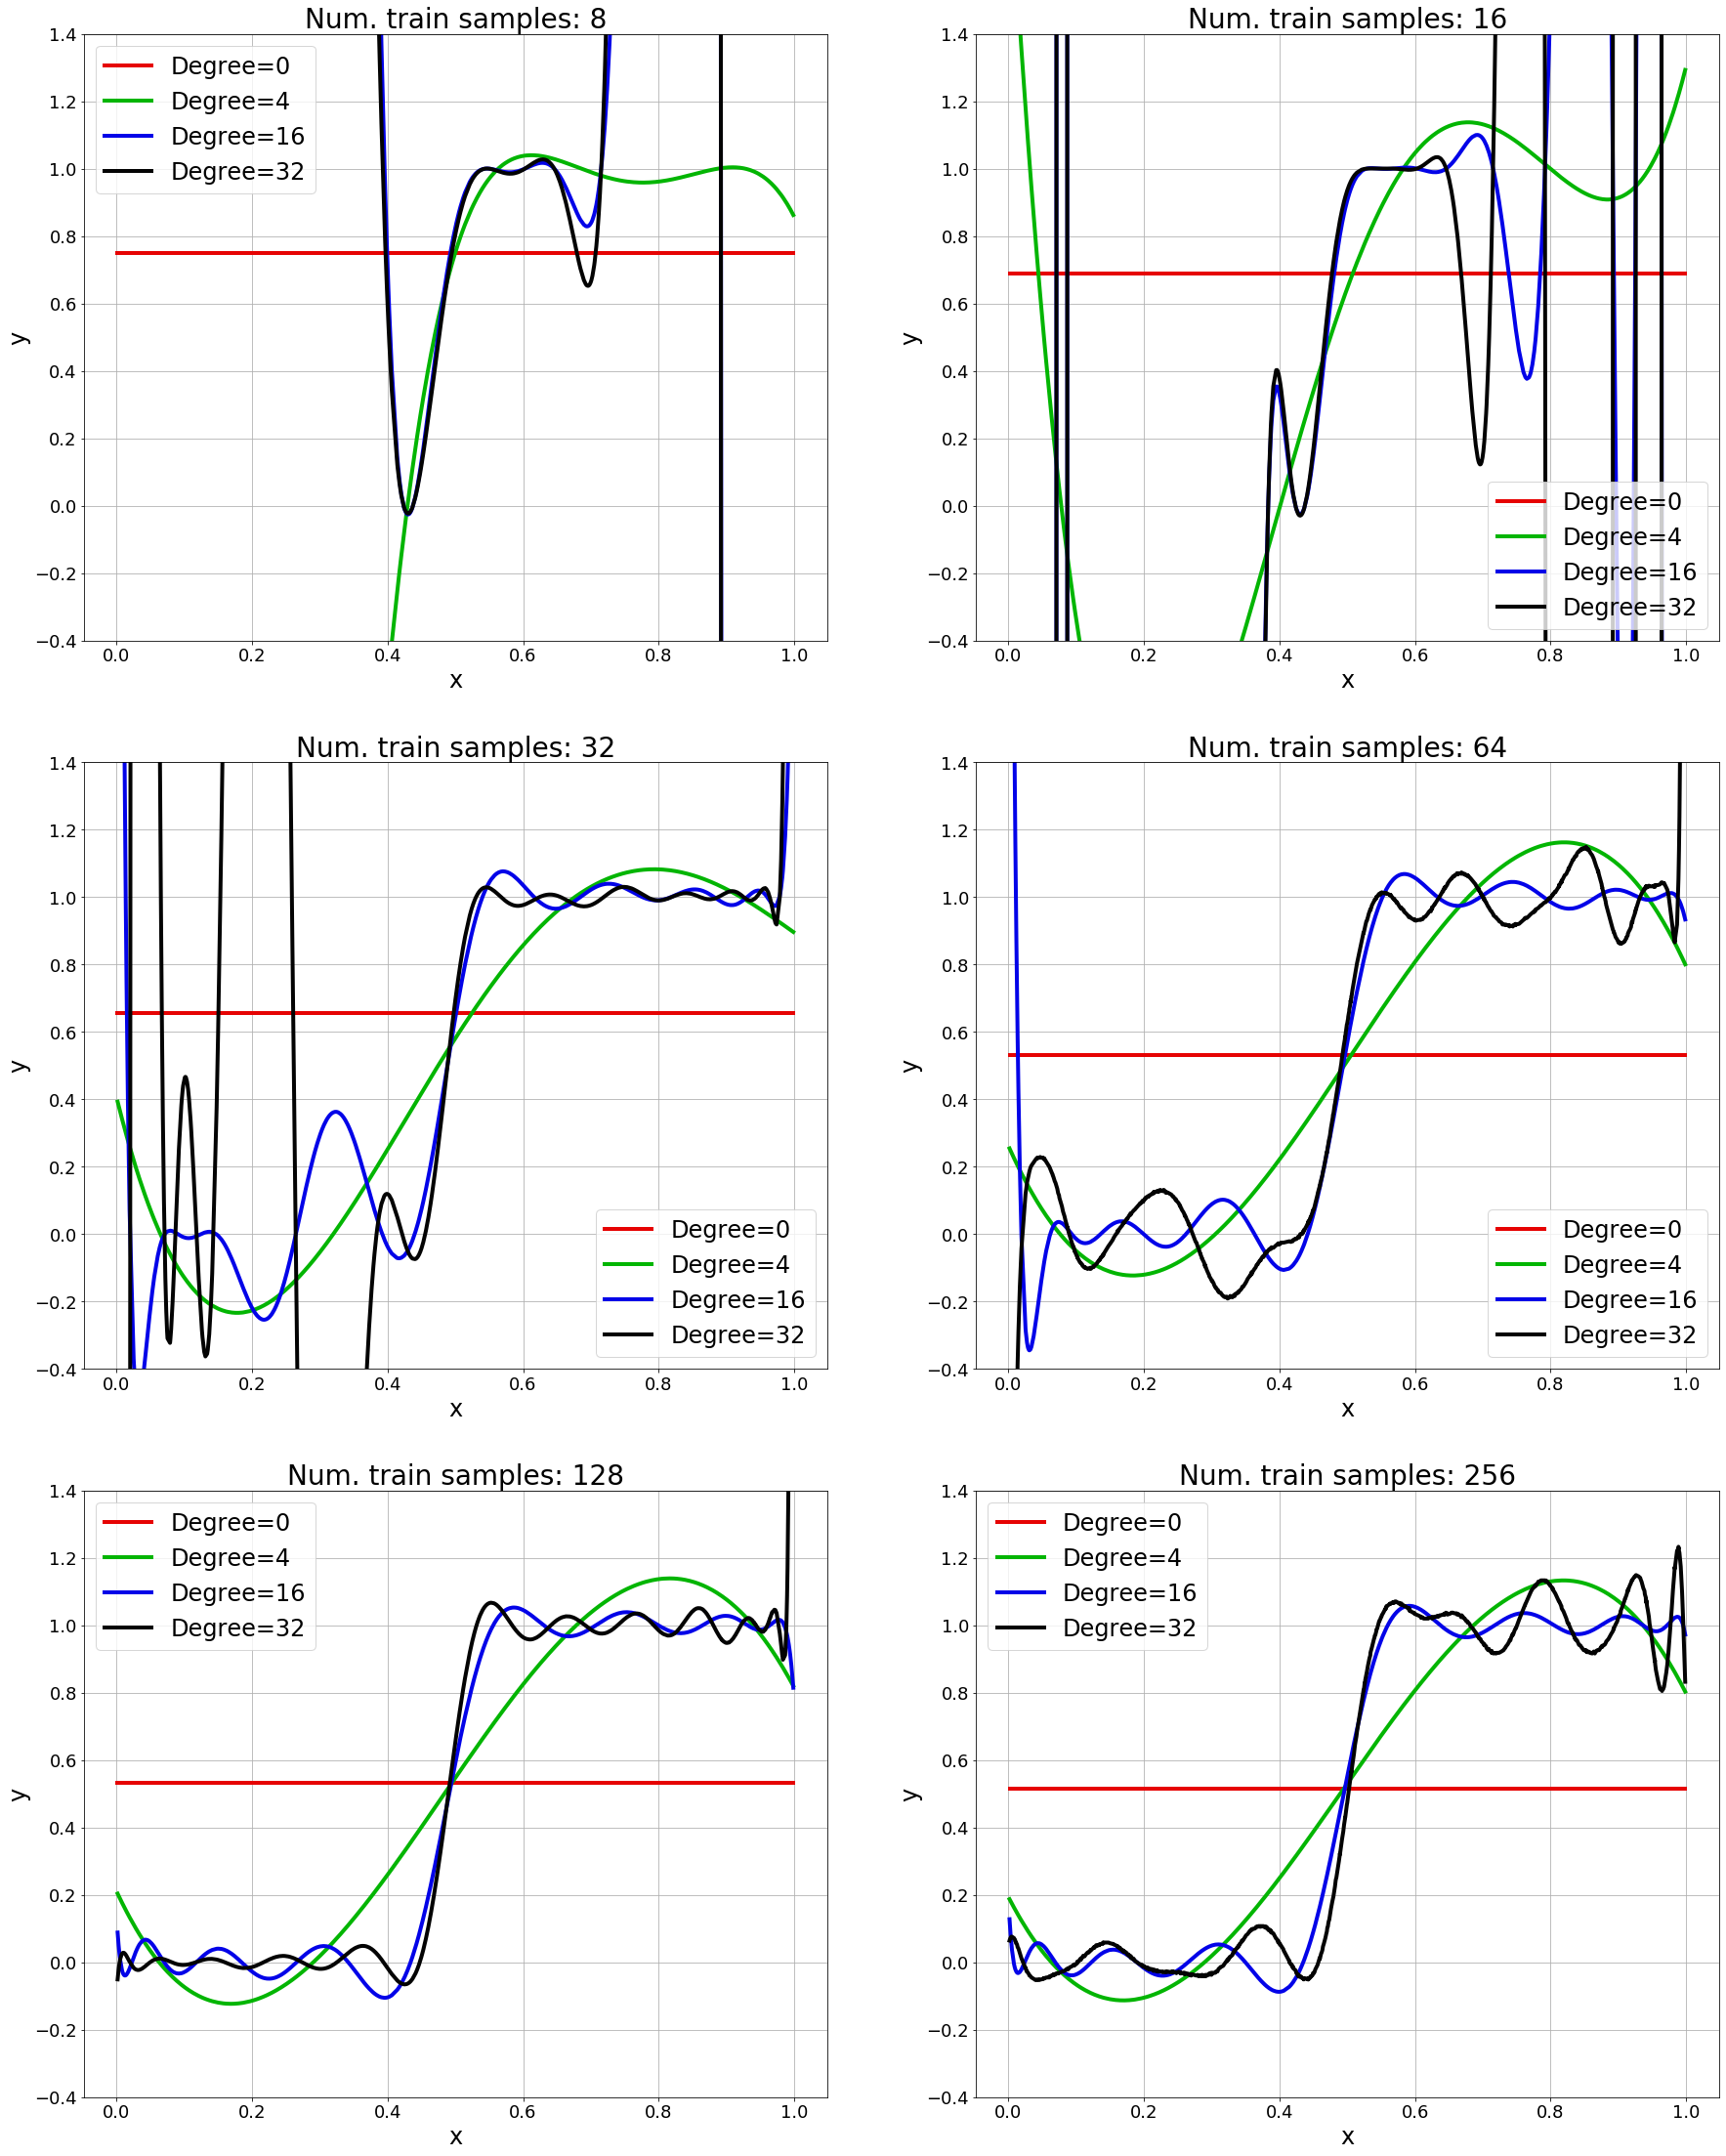

In [60]:
# Parameters.
degree = [0,4,16,32]  # Polynomial degree.
num_samples = [8,16,32,64,128,256]  # Number of training samples.

# All predictions.
preds = {}

# Num. training samples.
for n in num_samples:
    # Polynomial degree.
    preds[n] = {}
    for d in degree:
    
        #===================================================
        # TODO: Complete the next line to create the train 
        # dataset with the current number of samples (n).
        train_set = create_dataset(n)
        #===================================================
        
        # Run polynomial linear regression.
        model, pred = poly_linear_regression(train_set, test_set,\
                                             degree=d)
        
        # Root mean squared error for train and test sets.
        train_rmse = compute_rmse(train_set['y'],pred['train'])
        test_rmse = compute_rmse(test_set['y'],pred['test'])
        
        # Save predictions.
        preds[n][d] = {'train':{'x':train_set['x'], 'y':pred['train'], \
                       'rmse':train_rmse}, 'test':{'x':test_set['x'], \
                       'y':pred['test'], 'rmse':test_rmse}}
        
# Show prediction plots -test data-.   
utils.show_predictions_array(preds, data='test')

The next cell shows the RMSE values in terms of the number of training samples and the polynomial degree. RMSE is calculated for the training and test sets.

<font color="red">**Q3**</font>: Why is the test error high for small numbers of training samples while the train error keeps being low?<br> Because it overfits to the training dataset
<font color="red">**Q4**</font>: What is the impact of the training data size on polynomials with hih degree (eg. 32)? Almost no effect, it already overfitted enough

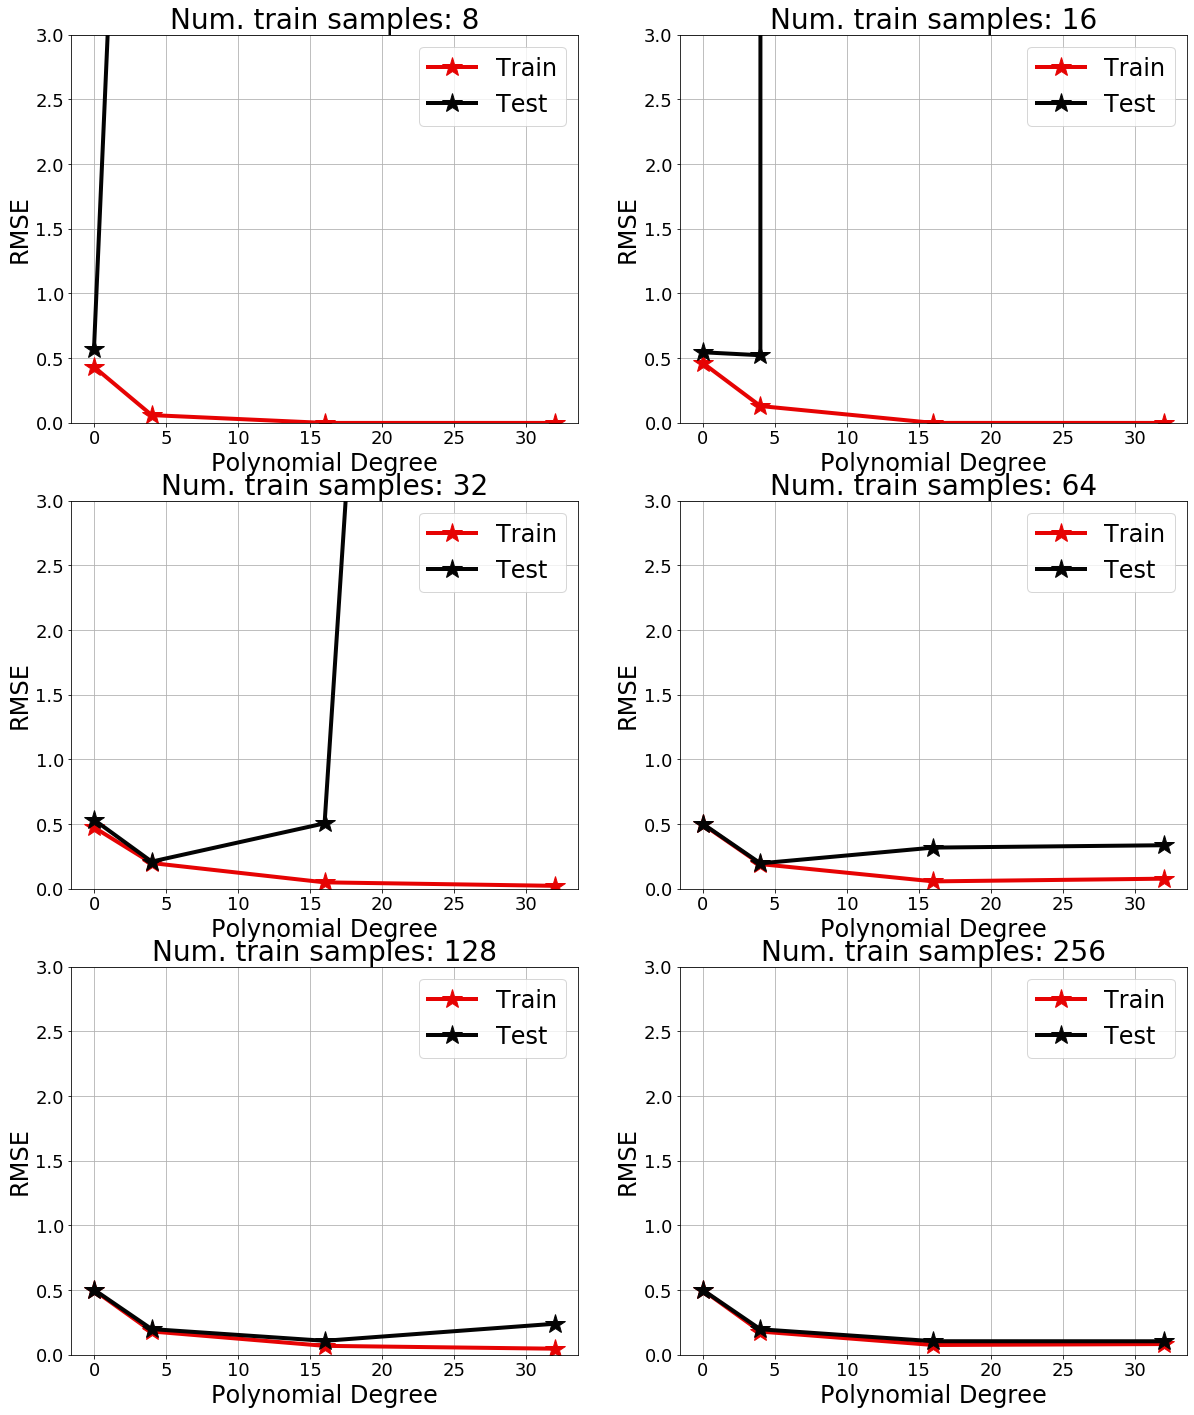

In [62]:
# Show RMSE values.   
utils.show_rmse_array(preds)

## **5. Ridge regression**

Ridge linear regression is implemented to deal with noisy data. 

The next cell creates the training and test sets including random noise.

Dataset format:
+ Train data: (100,)
+ Test data: (1000,)


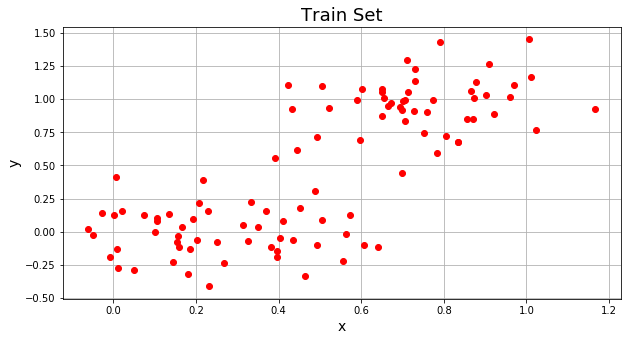

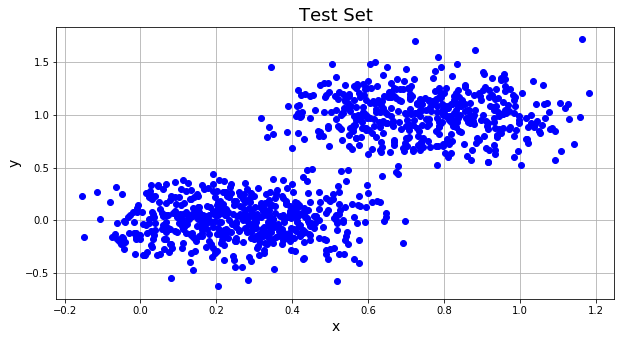

In [63]:
# Parameters.
num_train_samples = 100
num_test_samples = 1000

# Create train and test data with noise.
train_set = create_dataset(num_train_samples, test=False, noise=True)
test_set = create_dataset(num_test_samples, test=True, noise=True)

# Message.
print('Dataset format:')
print('+ Train data:', train_set['x'].shape)
print('+ Test data:', test_set['x'].shape)

# Show train and test samples.
utils.show_dataset(train_set, 'Train Set', color='r')
utils.show_dataset(test_set, 'Test Set', color='b')

The next function performs ridge linear regression using polynomial features. $\alpha$ controls the regularization.

In [64]:
# Rigde Polynomial linear regression.
def ridge_linear_regression(train_set, test_set, degree=0, alpha=0.0):
    """This function peforms ridge regression usiny polynomial features
    using the train data set. The obtained model is then used to 
    predict the targets for the train and test sets.
    
    Parameters:
    + train_set (dict): Dictionary with the train samples (x, y).
    + test_set (dict): Dictionary with the test samples (x, y).
    + degree (int): Polynomial degree (Default: 0).
    + alpha (float): Regularization penalty (Default: 0.0).
  
    Returns:
    + model (class): Trained linear model.
    + pred (dict): Dictionary containing the predictions for
        train and test samples.
    """
    
    # Create ridge regression model.
    model = Ridge(alpha=alpha)

    # Transforming the train and test data to 
    # include another axis.
    x_train = train_set['x'][:, np.newaxis]
    y_train = train_set['y'][:, np.newaxis]
    x_test = test_set['x'][:, np.newaxis]
    y_test = test_set['y'][:, np.newaxis]
  
    # Compute polynomial features.
    poly_feats = PolynomialFeatures(degree=degree)
    x_poly_train = poly_feats.fit_transform(x_train)
    x_poly_test = poly_feats.fit_transform(x_test)
   
    # Train/fit the model.
    model.fit(x_poly_train, y_train)
 
    # Prediction on train and test sets.
    y_pred_train = model.predict(x_poly_train)
    y_pred_test = model.predict(x_poly_test)
    pred = {'train':y_pred_train, 'test':y_pred_test}
       
    return model, pred

The code belows applies ridge regression for different polynomial degrees.

<font color="blue" size="+1">**Exercise 5: Ridge regression**</font>

Run the next cell for different alpha values: 0.0 (no regularization), 0.01, 0.05, 0.1, 1.0, and 10.0.

<font color="red">**Q1**</font>: What happens when alpha is large (eg. 10)?<br>

The large coefficients go to zero because of the weight (high) of the penalization for the coefficients. It becomes a straight line because only the first coefficient (degree = 0) pervails.

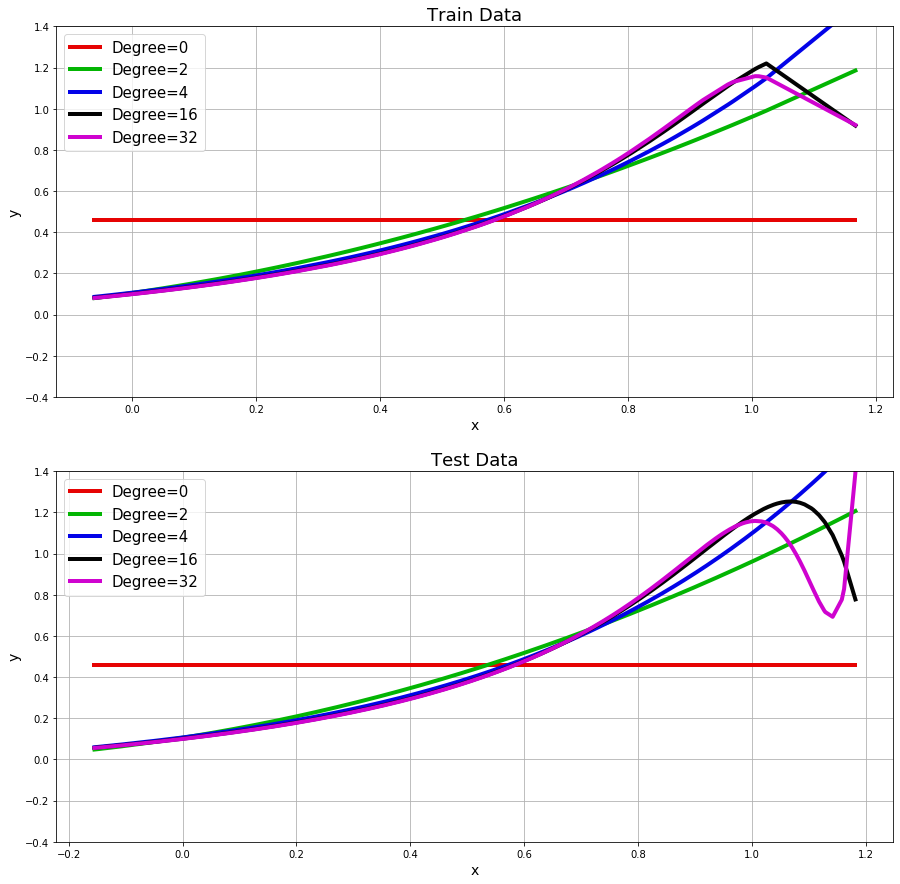

In [66]:
# Parameters.
alpha = 10.0  # Regularization penalty.
degree = [0,2,4,16,32]  # Polynomial degree.

# Polynomial degree.
preds = {} # All predictions.
for d in degree:
   
    # Run ridge regression.
    model, pred = ridge_linear_regression(train_set, test_set, \
                                          degree=d, alpha=alpha)
    # Save predictions.
    preds[d] = {'train':{'x':train_set['x'], 'y':pred['train']}, \
                'test':{'x':test_set['x'], 'y':pred['test']}}
        
# Show prediction plots.   
utils.show_predictions(preds)

<font color="blue" size="+1">**Exercise 6: Derivation**</font>

Derive analytically

<img src="./imgs/ex6-1.png" style="height: 100px;"/>

with

<img src="./imgs/ex6-2.png" style="height: 100px;"/>
